# Importing Libraries

In [1]:
import h5py
import os
import datetime as dt
import numpy as np
import pandas as pd
import pytz
import scipy.signal as ss
import matplotlib.pyplot as plt
%matplotlib inline

# Task 1 

In [2]:
file = "1541962108935000000_167_838.h5"

cern_time=pytz.timezone('Europe/Zurich')
unix_time=float(file[:18])/100000000

In [4]:
datetime_utc=dt.datetime.utcfromtimestamp(unix_time)
print("UTC time is:",datetime_utc)

UTC time is: 2018-11-11 18:48:28.935000


In [5]:
datetime_cern=pytz.utc.localize(datetime_utc).astimezone(cern_time)
print("CERN local time is:",datetime_cern)

CERN local time is: 2018-11-11 19:48:28.935000+01:00


# Task 2

In [6]:
FILE = h5py.File('1541962108935000000_167_838.h5')

In [7]:
data = {} #Dictionary will contain data

def fun(obj,branch):
    if(isinstance(branch,h5py.Dataset)):
        try:
            datatype=branch.dtype
        except Exception as e:
            datatype=str(e)
        data[obj]=['dataset', branch.size, branch.shape, datatype]
    else:
        data[obj]=['group',None,None,None]
FILE.visititems(fun)
dataframe = pd.DataFrame.from_dict(data,orient='index',columns=['Element-type','Size','Shape','Data-type'])

dataframe.to_csv('output_data.csv', sep=',')


In [8]:
# Head of dataframe
dataframe.head()

,Element-type,Size,Shape,Data-type
AwakeEventData,group,NaN,None,None
AwakeEventData/AIRTR01,group,NaN,None,None
AwakeEventData/AIRTR01/Acq,group,NaN,None,None
AwakeEventData/AIRTR01/Acq/numericPosition,dataset,1.0,"(1,)",float32
AwakeEventData/AIRTR02,group,NaN,None,None


# Task 3

In [16]:
image = FILE['/AwakeEventData/XMPP-STREAK/StreakImage/streakImageData'][:]
image_h = FILE['/AwakeEventData/XMPP-STREAK/StreakImage/streakImageHeight'][0]
image_w = FILE['/AwakeEventData/XMPP-STREAK/StreakImage/streakImageWidth'][0]

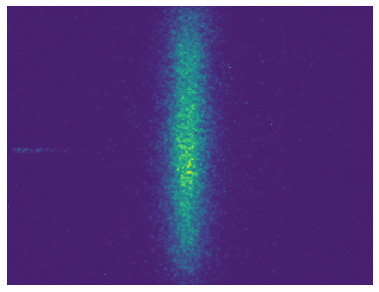

In [17]:
#plotting and filtering the image
image = np.reshape(image,(image_h,image_w))
filtered_image = ss.medfilt(image)

fig = plt.figure(figsize=(image_w/100,image_h/100))

ax = fig.add_subplot(111)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
ax.set_frame_on(False)
plt.imshow(filtered_image)
plt.savefig("output_image.png")